# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [2]:
print('Marcelo Antunes Soares Fantini' + ' RA 108341')
print('Rubens de Castro Pereira' + ' RA 217146') 

Marcelo Antunes Soares Fantini RA 108341
Rubens de Castro Pereira RA 217146


## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler 

df = pd.read_csv('data/heart_dataset.csv').drop(columns=['time'])
df.head(5)

# setting random seed 
np.random.seed(42)
random.seed(42)

### Analysis

(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

___
### Answers

#### Outliers

The following features have outliers:
- creatinine_phosphokinase
- ejection_fraction
- platelets
- serum_creatinine
- serum_sodium

#### Missing values

There are 24 missing values amongst features age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium and sex.

#### Categorical variables

Categorical variables will be converted to numeric features in order to simplify analysis, according to the following:

- In columns containing 'No' and 'Yes' we have used the dictionary `{'No' : 0, 'Yes' : 1}`;
- In the case of 'Male' and 'Female' we have used the dictionary `{'Male' : 0, 'Female' : 1}`.

Additionally, we will convert the column `high_blood_pressure` to `int64`.

#### Outliers

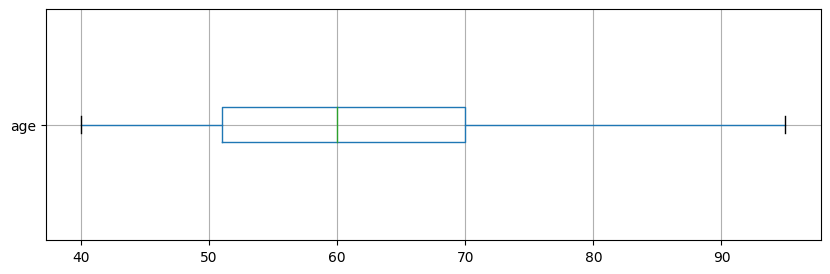

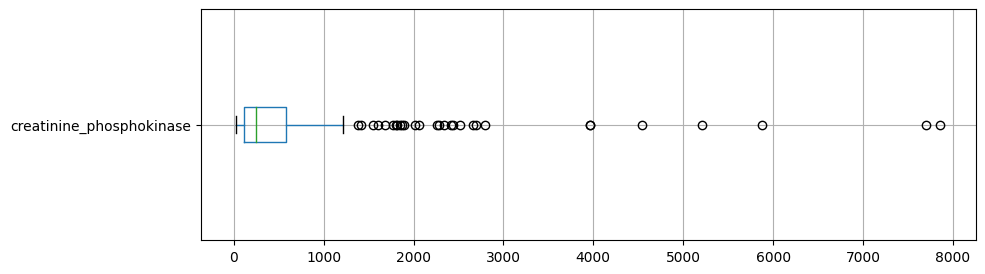

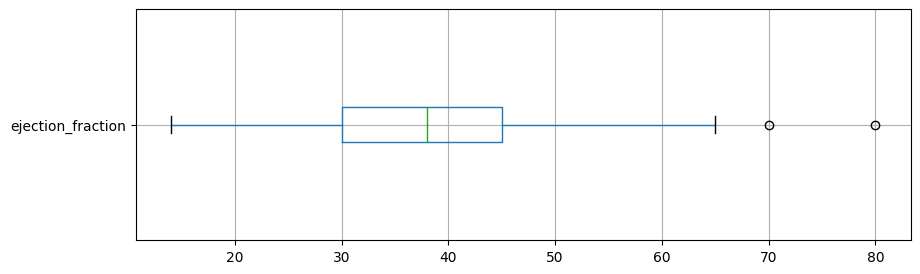

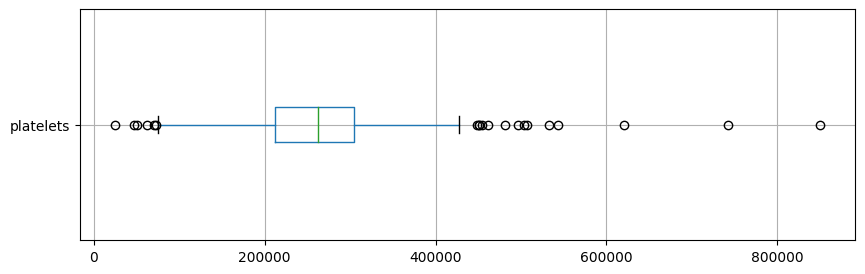

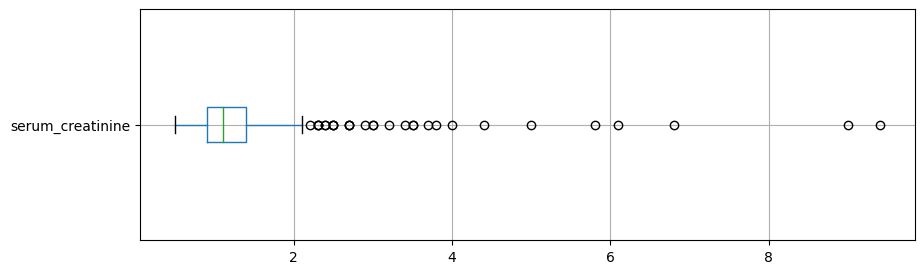

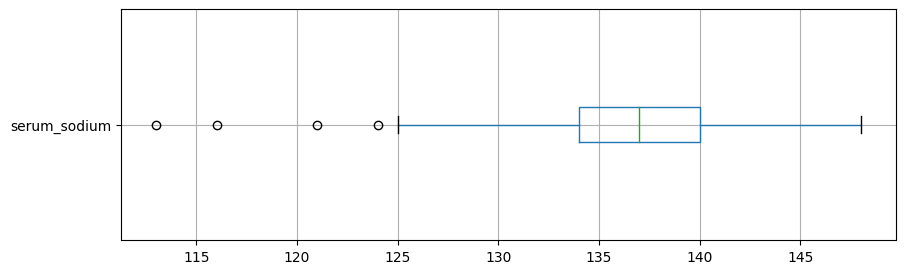

In [4]:
df.boxplot(['age'], vert=False, figsize=(10,3))
plt.show()
df.boxplot(['creatinine_phosphokinase'], vert=False, figsize=(10,3))
plt.show()
df.boxplot(['ejection_fraction'], vert=False, figsize=(10,3))
plt.show()
df.boxplot(['platelets'], vert=False, figsize=(10,3))
plt.show()
df.boxplot(['serum_creatinine'], vert=False, figsize=(10,3))
plt.show()
df.boxplot(['serum_sodium'], vert=False, figsize=(10,3))
plt.show()

#### Missing values

In [5]:
# Missing values
print(df.isnull().sum())

age                         4
anaemia                     1
creatinine_phosphokinase    2
diabetes                    2
ejection_fraction           2
high_blood_pressure         2
platelets                   3
serum_creatinine            2
serum_sodium                1
sex                         5
smoking                     0
DEATH_EVENT                 0
dtype: int64


In [6]:
# getting all NaN values in the columns as missing values 
frames = [ 
    df[df['age'].isna()],
    df[df['anaemia'].isna()],
    df[df['creatinine_phosphokinase'].isna()],
    df[df['diabetes'].isna()],
    df[df['ejection_fraction'].isna()],
    df[df['high_blood_pressure'].isna()],
    df[df['platelets'].isna()],
    df[df['serum_creatinine'].isna()],
    df[df['serum_sodium'].isna()],
    df[df['sex'].isna()],
    df[df['smoking'].isna()],
    df[df['DEATH_EVENT'].isna()]
]

df_missing_values = pd.concat(frames, ignore_index=False)
df_missing_values.sort_index()
df_missing_values

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1
17,NaN,No,582.0,No,14.0,0.0,166000.00,0.8,127.0,Female,No,1
295,NaN,No,1820.0,No,38.0,0.0,NaN,1.2,139.0,Male,No,0
296,NaN,No,2060.0,Yes,60.0,0.0,742000.00,0.8,138.0,Male,No,0
294,62.0,NaN,61.0,Yes,38.0,1.0,155000.00,1.1,143.0,Female,Yes,0
253,70.0,No,NaN,Yes,35.0,1.0,236000.00,1.2,132.0,Male,No,0
298,50.0,No,NaN,No,45.0,0.0,395000.00,1.6,136.0,Female,Yes,0
276,70.0,No,618.0,NaN,35.0,0.0,327000.00,1.1,142.0,Male,No,0
281,70.0,No,582.0,NaN,NaN,0.0,51000.00,2.7,136.0,Female,Yes,0
254,53.0,Yes,446.0,No,NaN,1.0,263358.03,1.0,139.0,Female,No,0


In [7]:
# Preprocessing Dataset.

# looking for outliers in dataset
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,295.000000,297.000000,297.000000,297.000000,296.000000,297.000000,298.000000,299.00000
mean,60.946895,584.801347,38.003367,0.353535,263387.475405,1.397542,136.620805,0.32107
std,11.896148,972.874154,11.805432,0.478874,98295.456485,1.036956,4.419177,0.46767
min,40.000000,23.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.00000
25%,51.000000,118.000000,30.000000,0.000000,211750.000000,0.900000,134.000000,0.00000
50%,60.000000,250.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.00000
75%,70.000000,582.000000,45.000000,1.000000,304000.000000,1.400000,140.000000,1.00000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.00000


In [8]:
print(f'-'*60)
print(f'Number of rows with missing values in any columns: {len(df_missing_values)} ')
print(f'-'*60)

------------------------------------------------------------
Number of rows with missing values in any columns: 24 
------------------------------------------------------------


## Preparation of dataset

1. We dropped the rows with missing values;
2. We didn't remove the rows with outliers;
3. We changed the categorical variables into numeric values.

In [9]:
# dropping missing values
df.dropna(inplace=True)
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,60.979545,581.960289,38.054152,0.364621,263354.998881,1.406751,136.646209,0.335740
std,12.079913,988.979954,11.924610,0.482195,94571.007935,1.063068,4.217514,0.473103
min,40.000000,23.000000,15.000000,0.000000,25100.000000,0.500000,113.000000,0.000000
25%,50.000000,115.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000
50%,60.000000,248.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.000000
75%,70.000000,582.000000,45.000000,1.000000,303000.000000,1.400000,140.000000,1.000000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,146.000000,1.000000


In [10]:
# Replacing categorical variables
# anaemia: no -> 0, yes -> 1
# diabetes: no -> 0, yes -> 1
# sex: male -> 0, female -> 1
# smoking: no -> 0, yes -> 1

df.replace({'No' : 0, 'Yes' : 1}, inplace=True)
df.replace({'Male' : 0, 'Female' : 1}, inplace=True)
df = df.replace({'high_blood_pressure' : {1.0 : 1, 0.0 : 0}}).astype({'high_blood_pressure' :'int64'})
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,1
5,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
287,45.0,0,582.0,1,55.0,0,543000.00,1.0,132.0,0,0,0
289,90.0,1,337.0,0,38.0,0,390000.00,0.9,144.0,0,0,0
290,45.0,0,615.0,1,55.0,0,222000.00,0.8,141.0,0,0,0
293,63.0,1,103.0,1,35.0,0,179000.00,0.9,136.0,1,1,0


## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blod based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

In [11]:
# Split data and normalize. You can use scikit-learn libraries.
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [12]:
df_lin_reg = df.drop(columns=['DEATH_EVENT'])
df_lin_reg.reset_index(inplace=True)
df_lin_reg.drop(columns=['index'], inplace=True)
df_lin_reg

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0
4,90.0,1,47.0,0,40.0,1,204000.00,2.1,132.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
272,45.0,0,582.0,1,55.0,0,543000.00,1.0,132.0,0,0
273,90.0,1,337.0,0,38.0,0,390000.00,0.9,144.0,0,0
274,45.0,0,615.0,1,55.0,0,222000.00,0.8,141.0,0,0
275,63.0,1,103.0,1,35.0,0,179000.00,0.9,136.0,1,1


### Splitting data into training, validation and test sets

In [13]:
X = df_lin_reg.drop(columns=['serum_creatinine'])
y = df_lin_reg[['serum_creatinine']]

In [14]:
# Splitting dataset 

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

X_valid_original, X_test_original, y_valid_original, y_test_original = train_test_split(X_test_original, y_test_original, train_size=0.66, test_size=0.33, random_state=42)

print(f'-'*70)
print()
print(f'Statistic of splitted dataset:')
print()
print(f'Training size   : {len(X_train_original)} - {(len(X_train_original) / len(X))*100:.2f}%')
print(f'Validation size : {len(X_valid_original)}  - {(len(X_valid_original) / len(X))*100:.2f}%')
print(f'Testing size    : {len(X_test_original)}  - {(len(X_test_original) / len(X))*100:.2f}%')
print(f'Dataset size    : {len(X)} - 100%')

----------------------------------------------------------------------

Statistic of splitted dataset:

Training size   : 193 - 69.68%
Validation size : 55  - 19.86%
Testing size    : 28  - 10.11%
Dataset size    : 277 - 100%


### Selecting features from datasets

We wil also evaluate the performance of methods by feature selecting criteria:
1. All dataset features.
3. The features with correlation greater than zero.
2. The two features with the best correlations between their.

In [15]:
# creating dataset selecting features to allow the evaluation of the models
X_train_all_features = X_train_original.copy()
X_valid_all_features = X_valid_original.copy()
X_test_all_features  = X_test_original.copy()

X_train_features_correlated_non_zero = X_train_original[['serum_sodium', 'age', 'high_blood_pressure', 'platelets', 'sex', 'ejection_fraction', 'anaemia']].copy()
X_valid_features_correlated_non_zero = X_valid_original[['serum_sodium', 'age', 'high_blood_pressure', 'platelets', 'sex', 'ejection_fraction', 'anaemia']].copy()
X_test_features_correlated_non_zero  = X_test_original[['serum_sodium', 'age', 'high_blood_pressure', 'platelets', 'sex', 'ejection_fraction', 'anaemia']].copy()

X_train_features_top_2 = X_train_original[['serum_sodium', 'age']].copy()
X_valid_features_top_2 = X_valid_original[['serum_sodium', 'age']].copy()
X_test_features_top_2  = X_test_original[['serum_sodium', 'age']].copy()

### Feature scaling on training, validation and test sets

In [16]:
scaler = MinMaxScaler()

scaler.fit(X_train_all_features)
scaled_X_train_all_features = scaler.transform(X_train_all_features)
scaled_X_valid_all_features = scaler.transform(X_valid_all_features)
scaled_X_test_all_features  = scaler.transform(X_test_all_features)

scaler.fit(X_train_features_correlated_non_zero)
scaled_X_train_features_corr_non_zero = scaler.transform(X_train_features_correlated_non_zero)
scaled_X_valid_features_corr_non_zero = scaler.transform(X_valid_features_correlated_non_zero)
scaled_X_test_features_corr_non_zero  = scaler.transform(X_test_features_correlated_non_zero)

scaler.fit(X_train_features_top_2)
scaled_X_train_features_top_2 = scaler.transform(X_train_features_top_2)
scaled_X_valid_features_top_2 = scaler.transform(X_valid_features_top_2)
scaled_X_test_features_top_2  = scaler.transform(X_test_features_top_2)

y_train = np.array(y_train_original)
y_valid = np.array(y_valid_original)
y_test = np.array(y_test_original)

___
### Answers

#### Do we need to split the data into train, valid and test? How?

> Yes, we need to split the data into three different datasets (train, validation, and test) to allow the best choice the model and the model parameters. The validation dataset is very important to measure the error in the model training. The test dataset can be used just once at the end of the process.

> We chose 70% for training data, 20% for validation data and 10% for test data.

#### Do we need to normalize the data? How? The normalization is equal to train, valid and test split?

> We have some features where the range of values are pretty different one each other. So, we used to normalize all the data after converting the categorical variable. To avoid adding bias in the data, we must to fit the training data to get the normalization parameters, and after we use to transform the training, validation and test features datasets. We must not to normalize the dataset of target variable.

> The MinMaxScaler method of the Preprocessing class from Scikit Learn was used to scaling (normalize) the features.

### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

In [17]:
from sklearn.feature_selection import mutual_info_regression

# Feature selection.

y_array_like = np.array(y).reshape(-1,)
mutual_info_reg = mutual_info_regression(X, y_array_like, random_state=42)
print(mutual_info_reg)
print()

mutual_info_reg = pd.Series(mutual_info_reg)
mutual_info_reg.index = X.columns
mir = mutual_info_reg.sort_values(ascending=False)
print(mir)

[0.06538653 0.0002344  0.         0.         0.02488475 0.03036783
 0.02738513 0.15965753 0.02715119 0.        ]

serum_sodium                0.159658
age                         0.065387
high_blood_pressure         0.030368
platelets                   0.027385
sex                         0.027151
ejection_fraction           0.024885
anaemia                     0.000234
creatinine_phosphokinase    0.000000
diabetes                    0.000000
smoking                     0.000000
dtype: float64


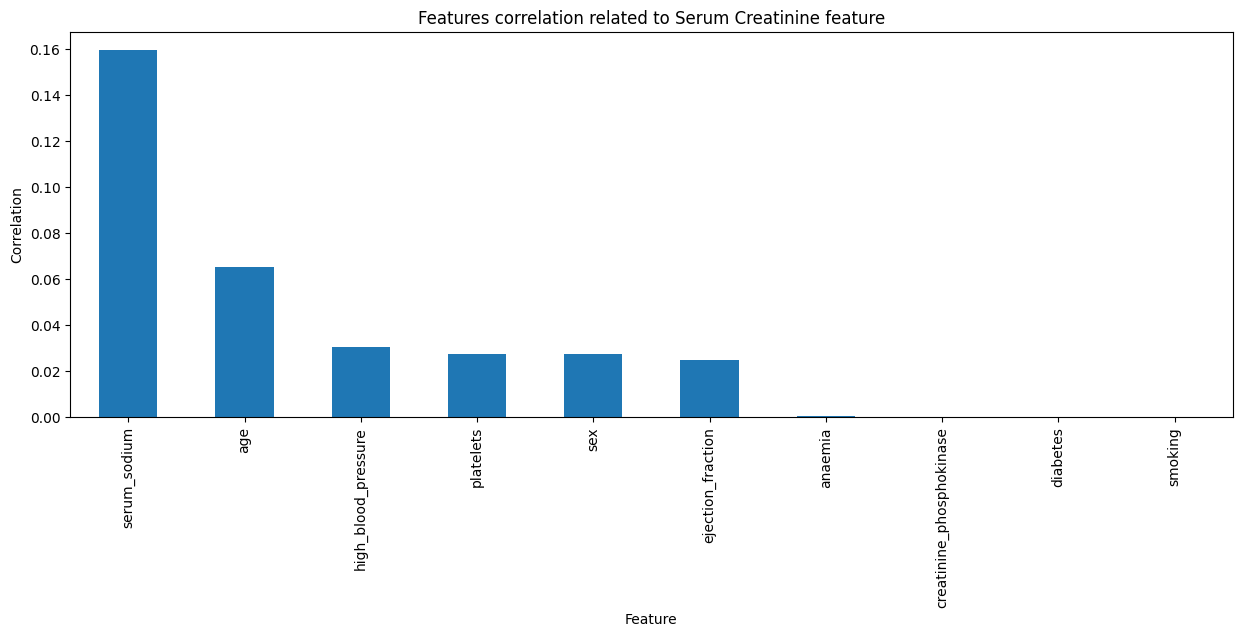

In [18]:
mutual_info_reg.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.title('Features correlation related to Serum Creatinine feature')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

In [19]:
# compute the correlation matrix of columns, excluding NA/null values.
df_lin_reg.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
age,1.000000,0.081807,-0.085623,-0.117457,0.071869,0.078830,-0.028717,0.151729,-0.058695,0.082232,0.022912
anaemia,0.081807,1.000000,-0.192999,-0.021808,0.045309,0.026955,-0.041323,0.044833,0.092901,-0.093077,-0.112989
creatinine_phosphokinase,-0.085623,-0.192999,1.000000,-0.020895,-0.056450,-0.061982,-0.002773,-0.013164,0.058633,0.101439,0.019252
diabetes,-0.117457,-0.021808,-0.020895,1.000000,0.010324,-0.014177,0.077854,-0.053828,-0.073639,-0.158039,-0.162138
ejection_fraction,0.071869,0.045309,-0.056450,0.010324,1.000000,0.008526,0.033938,-0.001055,0.134526,-0.162823,-0.078276
high_blood_pressure,0.078830,0.026955,-0.061982,-0.014177,0.008526,1.000000,0.067348,-0.006021,0.010214,-0.113995,-0.061111
platelets,-0.028717,-0.041323,-0.002773,0.077854,0.033938,0.067348,1.000000,-0.032682,0.072478,-0.091105,0.042810
serum_creatinine,0.151729,0.044833,-0.013164,-0.053828,-0.001055,-0.006021,-0.032682,1.000000,-0.180596,0.009474,-0.035213
serum_sodium,-0.058695,0.092901,0.058633,-0.073639,0.134526,0.010214,0.072478,-0.180596,1.000000,-0.053214,-0.011277
sex,0.082232,-0.093077,0.101439,-0.158039,-0.162823,-0.113995,-0.091105,0.009474,-0.053214,1.000000,0.448834


___
### Answers of the Question 1.

**1.1 Do we need all the features to predict the target value?**

According by the *mutual_info_regression* function (sklearn), we can observe the mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The features are age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_sodium, sex, and smoking. The target value is serum_creatinine. 

We observed it's possible to predict the target value with the more representative features, that is, the feratures have higher correlation between all featurs. In our experiment, the features serum_sodium, and age allowed to get a good model with its parameters. 

___
**1.2 What happens if we drop the low correlation features?**

The features with low correlation has low impact in the linear regression due to its low contribution in the regression. But if we dropped them, maybe the regression coefficients of the remaining features may change leading us to a different interpretation of the coefficients.

> **What are the conclusions? (1-2 paragraphs)**

The correlation between features is an important step in the regression process, because when it well done, probably we can reduce the number of features to consider in the model during the training phase, reducing computatinal resouces and processing time without loss the robustness and accuracy of the model.

In our solution, we decided to build three different datasets groups related to features:
1. all features.
2. the features with correlation non zero.
3. the two best features correlations.

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

In [20]:
# MSE Loss. You cannot use scikit-learn!!

# Compute Mean Squared Error (MSE) between the known (ground-truth) and predicted values.
def MSE(y_ground_truth, y_predict):
  # calculating MSE
  mse = np.mean((y_ground_truth - y_predict) ** 2)

  # returning MSE between known y and predicted y
  return mse 

In [21]:
# Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!

class AnalyticalLinearRegression():

  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    # calculating y predict 
    y_predict = np.matmul(X, self.weights)

    # returning y_predict 
    return y_predict

  def fit(self, X, y):

    # calculating the Roose-Penrose pseudoinverse of X
    X_pseudoinverse = np.linalg.pinv(X)

    # calculating y predicted 
    self.weights = np.matmul(X_pseudoinverse, y)
 

# creating Linear Regression instance 
model = AnalyticalLinearRegression()

# fitting model with training data 
model.fit(scaled_X_train_all_features, y_train)

# predicting model with test data 
y_valid_predict = model.predict(scaled_X_valid_all_features)

# calculating MSE of model 
mse_analytical_linear_regression_valid = MSE(y_valid, y_valid_predict)
print(f'-'*70)
print(f'MSE of analytical LR with validation dataset: {mse_analytical_linear_regression_valid}')
print(f'-'*70)

----------------------------------------------------------------------
MSE of analytical LR with validation dataset: 1.4931157618947686
----------------------------------------------------------------------


In [22]:
# Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
# Inspirations:
#   https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
#   https://stats.stackexchange.com/questions/432683/how-to-plot-cost-function-against-iterations

class GradientDescentLinearRegression():

  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None
    self.costs            = None

  # predicting values using the model 
  def predict(self, X_predict):
    # calculating y predict 
    y_predict = np.dot(X_predict, self.weights) + self.bias

    # returning y_predict 
    return y_predict

  #  fitting the model 
  def fit(self, X_train, y_train, X_valid, y_valid, learning_rate, epochs):

    # setting the initial parameters 
    number_of_samples, number_of_features = X_train.shape
    self.weights = np.zeros((number_of_features, 1))
    self.learning_rate = learning_rate
    self.bias = 0
    self.train_costs = []
    self.valid_costs = []
 
    # calculating the gradient descent 
    for i in range(epochs):
        # calculating y predict of training dataset 
        y_train_predict = self.predict(X_train)

        # calculating costs using MSE
        train_cost = MSE(y_train, y_train_predict)
        self.train_costs.append(train_cost)

        # calculating y predict of training dataset 
        y_valid_predict = self.predict(X_valid)

        # calculating costs using MSE
        valid_cost = MSE(y_valid, y_valid_predict)
        self.valid_costs.append(valid_cost)

        # calculating the gradients
        delta_w = (-2 / number_of_samples) * sum(X_train * (y_train - y_train_predict) )

        # calculating the loss
        delta_bias = (-2 / number_of_samples) * sum(y_train - y_train_predict)

        # updating weights and bias 
        self.weights = self.weights - self.learning_rate * delta_w.reshape(number_of_features, 1)
        self.bias = self.bias - self.learning_rate * delta_bias

# creating Linear Regression instance 
gdlr_model = GradientDescentLinearRegression()

# fitting model with training data
gdlr_model.fit(scaled_X_train_all_features, y_train, scaled_X_valid_all_features, y_valid, 0.01, 1000)

# predicting model with valid data 
y_valid_predict = gdlr_model.predict(scaled_X_valid_all_features)

# calculating MSE of model 
mse_gradient_descent_linear_regression_valid = MSE(y_valid, y_valid_predict)
print(f'-'*70)
print(f'MSE of Gradient Descent LR with validation dataset: {mse_gradient_descent_linear_regression_valid}')
print(f'-'*70)

----------------------------------------------------------------------
MSE of Gradient Descent LR with validation dataset: 1.3378790566443104
----------------------------------------------------------------------


In [23]:
# Linear Regression. You can use scikit-learn libraries.

def execute_linear_reg_sklearn (X_train_sklearn, y_train_sklearn, X_valid_sklearn, y_valid_sklearn, learning_rate_sklearn):

    # Training the model

    # creating SGDRegressor instance 
    sgdr = SGDRegressor(learning_rate='constant', eta0=learning_rate_sklearn, random_state=42)

    # fitting the model on train data 
    sgdr.fit(X_train_sklearn, y_train_sklearn.reshape(-1,))
    
    # Predicting result 
    y_predict_sklearn = sgdr.predict(X_valid_sklearn)

    # calculate the mean squared error
    mse_valid_sklearn = mean_squared_error(y_valid_sklearn, y_predict_sklearn.reshape(-1,1))
            
    # returning results
    return sgdr.coef_, y_predict_sklearn, mse_valid_sklearn 


# calculating linear regression with sklearn functions
weights, y_train_predict, mse_valid_sklearn = execute_linear_reg_sklearn(
    scaled_X_train_all_features, y_train, scaled_X_valid_all_features, y_valid, 0.01)

# printing results 
print(f'-'*50)
print(f'mse sklearn of function with validation data: {mse_valid_sklearn}')
print(f'-'*50)

--------------------------------------------------
mse sklearn of function with validation data: 1.3324776780811134
--------------------------------------------------


In [24]:
# evaluating models with all features

# 1) Analytical linear regression
alr_model_all_features = AnalyticalLinearRegression()
alr_model_all_features.fit(scaled_X_train_all_features, y_train)
alr_y_predict_all_features = alr_model_all_features.predict(scaled_X_valid_all_features)
mse_analytical_linear_regression_all_features = MSE(y_valid, alr_y_predict_all_features)

# 2) Gradient descent linear regression
gdlr_model_all_features = GradientDescentLinearRegression()
gdlr_model_all_features.fit(scaled_X_train_all_features, y_train, scaled_X_valid_all_features, y_valid, 0.01, 1000)
gdlr_y_predict_all_features = gdlr_model_all_features.predict(scaled_X_valid_all_features)
mse_gradient_descent_linear_regression_all_features = MSE(y_valid, gdlr_y_predict_all_features)

# 3) Sklearn linear regression 
weights, skl_y_predict_all_features, mse_sklearn_all_features = execute_linear_reg_sklearn(
    scaled_X_train_all_features, y_train, scaled_X_valid_all_features, y_valid, 0.01)

print(f'Evaluating model with all features')
print()
print(f'MSE Analytical Linear Regression       : {mse_analytical_linear_regression_all_features}')
print(f'MSE Gradient Descent Linear Regression : {mse_gradient_descent_linear_regression_all_features}')
print(f'MSE Sklearn Linear Regression          : {mse_sklearn_all_features}')

Evaluating model with all features

MSE Analytical Linear Regression       : 1.4931157618947686
MSE Gradient Descent Linear Regression : 1.3378790566443104
MSE Sklearn Linear Regression          : 1.3324776780811134


In [25]:
# evaluating models with the features with correlation non zero

# 1) Analytical linear regression
alr_model_features_corr_non_zero = AnalyticalLinearRegression()
alr_model_features_corr_non_zero.fit(scaled_X_train_features_corr_non_zero, y_train)
alr_y_predict_features_corr_non_zero = alr_model_features_corr_non_zero.predict(scaled_X_valid_features_corr_non_zero)
mse_analytical_linear_regression_features_corr_non_zero = MSE(y_valid, alr_y_predict_features_corr_non_zero)

# 2) Gradient descent linear regression
gdlr_model_features_corr_non_zero = GradientDescentLinearRegression()
gdlr_model_features_corr_non_zero.fit(scaled_X_train_features_corr_non_zero, y_train, scaled_X_valid_features_corr_non_zero, y_valid, 0.01, 1000)
gdlr_y_predict_features_corr_non_zero = gdlr_model_features_corr_non_zero.predict(scaled_X_valid_features_corr_non_zero)
mse_gradient_descent_linear_regression_features_corr_non_zero = MSE(y_valid, gdlr_y_predict_features_corr_non_zero)

# 3) Sklearn linear regression 
weights, skl_y_predict_features_corr_non_zero, mse_sklearn_features_corr_non_zero = execute_linear_reg_sklearn(
    scaled_X_train_features_corr_non_zero, y_train, scaled_X_valid_features_corr_non_zero, y_valid, 0.01)

print(f'Evaluating model with features of correlation non zero')
print()
print(f'MSE Analytical Linear Regression       : {mse_analytical_linear_regression_features_corr_non_zero}')
print(f'MSE Gradient Descent Linear Regression : {mse_gradient_descent_linear_regression_features_corr_non_zero}')
print(f'MSE Sklearn Linear Regression          : {mse_sklearn_features_corr_non_zero}')

Evaluating model with features of correlation non zero

MSE Analytical Linear Regression       : 1.4996422266643408
MSE Gradient Descent Linear Regression : 1.34192486102579
MSE Sklearn Linear Regression          : 1.3431464977688183


In [26]:
# evaluating models with the two best correlations

# 1) Analytical linear regression
alr_model_features_top_2 = AnalyticalLinearRegression()
alr_model_features_top_2.fit(scaled_X_train_features_top_2, y_train)
alr_y_predict_features_top_2 = alr_model_features_top_2.predict(scaled_X_valid_features_top_2)
mse_analytical_linear_regression_features_top_2 = MSE(y_valid, alr_y_predict_features_top_2)

# 2) Gradient descent linear regression
gdlr_model_features_top_2 = GradientDescentLinearRegression()
gdlr_model_features_top_2.fit(scaled_X_train_features_top_2, y_train, scaled_X_valid_features_top_2, y_valid, 0.01, 1000)
gdlr_y_predict_features_top_2 = gdlr_model_features_top_2.predict(scaled_X_valid_features_top_2)
mse_gradient_descent_linear_regression_features_top_2 = MSE(y_valid, gdlr_y_predict_features_top_2)

# 3) Sklearn linear regression 
weights, skl_y_predict_features_top_2, mse_sklearn_features_top_2 = execute_linear_reg_sklearn(
    scaled_X_train_features_top_2, y_train, scaled_X_valid_features_top_2, y_valid, 0.01)

print(f'Evaluating models with the best two features correlations')
print()
print(f'MSE Analytical Linear Regression       : {mse_analytical_linear_regression_features_top_2}')
print(f'MSE Gradient Descent Linear Regression : {mse_gradient_descent_linear_regression_features_top_2}')
print(f'MSE Sklearn Linear Regression          : {mse_sklearn_features_top_2}')

Evaluating models with the best two features correlations

MSE Analytical Linear Regression       : 1.5196308915551369
MSE Gradient Descent Linear Regression : 1.316660795633629
MSE Sklearn Linear Regression          : 1.3001055204290985


In [27]:
print(f'Comparision of MSE:')

table = [
    ['All features', mse_analytical_linear_regression_all_features, mse_gradient_descent_linear_regression_all_features, mse_sklearn_all_features]
    ,['Features correlation non zero', mse_analytical_linear_regression_features_corr_non_zero, mse_gradient_descent_linear_regression_features_corr_non_zero, mse_sklearn_features_corr_non_zero]
    ,['Best two features', mse_analytical_linear_regression_features_top_2, mse_gradient_descent_linear_regression_features_top_2, mse_sklearn_features_top_2]
    ]

df_table = pd.DataFrame(table, columns=['number_of_features', 'analytical_linear_regression', 'gradient_descent_linear_regression', 'sklearn_linear_regression'])

df_table

# print(f'MSE analytical LR .....: {mse_analytical_linear_regression_test}')
# print(f'MSE gradient descent LR: {mse_gradient_descent_linear_regression_test}')
# print(f'MSE sklearn LR ........: {mse_test_sklearn}')

Comparision of MSE:


,number_of_features,analytical_linear_regression,gradient_descent_linear_regression,sklearn_linear_regression
0,All features,1.493116,1.337879,1.332478
1,Features correlation non zero,1.499642,1.341925,1.343146
2,Best two features,1.519631,1.316661,1.300106


> What are the conclusions? (1-2 paragraphs)

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

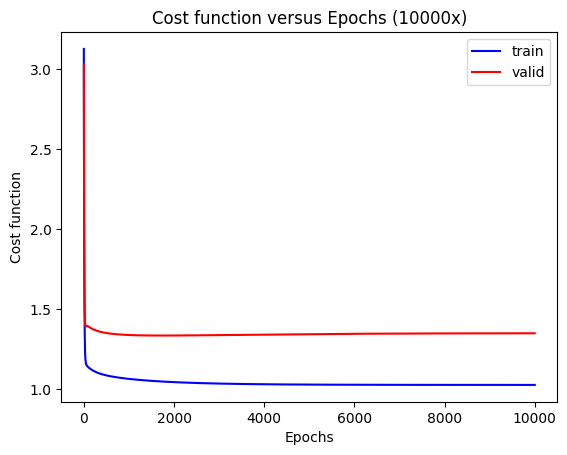

In [98]:
# Plot the cost function vs. number of iterations in the training set.

# creating Linear Regression instance 
gdlr_model = GradientDescentLinearRegression()

# setting epochs number
epochs = 10000

# fitting model with training data
gdlr_model.fit(scaled_X_train_all_features, y_train, scaled_X_valid_all_features, y_valid, 0.01, epochs)

# plotting cost function versus epochs 
plt.plot(list(range(epochs)), gdlr_model.train_costs, '-b', label='train')
plt.plot(list(range(epochs)), gdlr_model.valid_costs, '-r', label='valid')
title = 'Cost function versus Epochs (' + str(epochs) + 'x)'
plt.title(title)
plt.xlabel('Epochs')
plt.ylabel('Cost function')
plt.legend()
plt.show()


> What are the conclusions? (1-2 paragraphs)

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [29]:
# Different learning rates. You can use scikit-learn libraries.

# calculating linear regression with sklearn functions

learning_rates = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.10, 0.15, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.70, 0.75, 1.0, 2.0, 4.0]
mse_learning_rates = []
for learning_rate in learning_rates:
    # weights, y_train_predict, mse_sklearn = execute_linear_reg_sklearn(
    #     scaled_X_train_all_features, y_train, scaled_X_valid_all_features, y_valid, learning_rate)
    weights, y_train_predict, mse_sklearn = execute_linear_reg_sklearn(
        scaled_X_train_features_top_2, y_train, scaled_X_valid_features_top_2, y_valid, learning_rate)
    mse_learning_rates.append(mse_sklearn)
    print(f'learning_rate: {learning_rate:0.6f} - mse: {mse_sklearn}')

learning_rate: 0.000001 - mse: 3.0218299015408014
learning_rate: 0.000010 - mse: 1.550707372086444
learning_rate: 0.000100 - mse: 1.3384931414356893
learning_rate: 0.001000 - mse: 1.3390181186805425
learning_rate: 0.010000 - mse: 1.3001055204290985
learning_rate: 0.050000 - mse: 1.3258419376531092
learning_rate: 0.100000 - mse: 1.3118406714495028
learning_rate: 0.150000 - mse: 1.3094934253364903
learning_rate: 0.300000 - mse: 1.3176887612101238
learning_rate: 0.350000 - mse: 1.3234180026086035
learning_rate: 0.400000 - mse: 1.3288324836721328
learning_rate: 0.450000 - mse: 1.332410492629941
learning_rate: 0.500000 - mse: 1.8362428710986747
learning_rate: 0.550000 - mse: 1.4291431739530345
learning_rate: 0.700000 - mse: 3.1656219777916
learning_rate: 0.750000 - mse: 5.88376546331243
learning_rate: 1.000000 - mse: 1.4950620057899673
learning_rate: 2.000000 - mse: 5.565862232878939e+23
learning_rate: 4.000000 - mse: 3.9359183819528064e+24


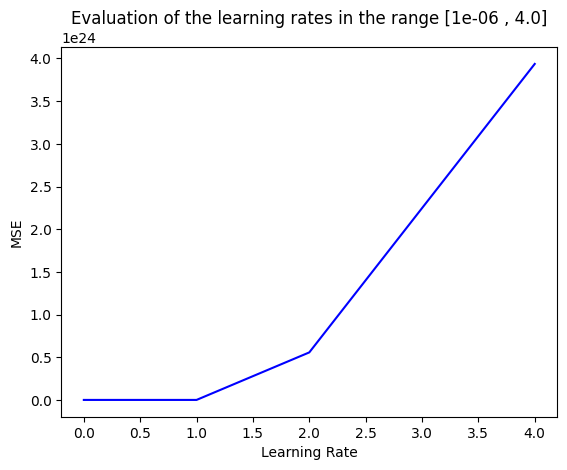

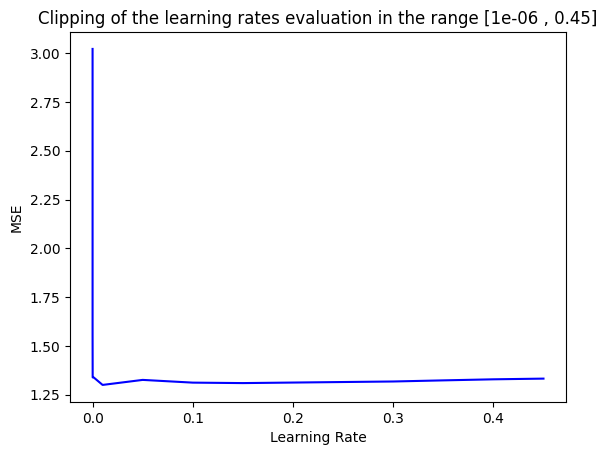

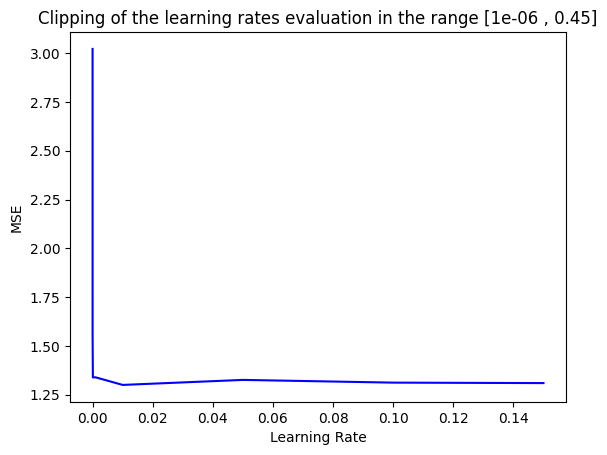

In [97]:
# plotting MSE for many learning rates

# plotting cost function versus epochs 
plt.plot(learning_rates, mse_learning_rates, '-b')
title = 'Evaluation of the learning rates in the range [' + str(min(learning_rates)) + ' , ' + str(max(learning_rates)) + ']'
plt.title(title)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.show()

plt.plot(learning_rates[:12], mse_learning_rates[:12], '-b')
title = 'Clipping of the learning rates evaluation in the range [' + str(min(learning_rates[:12])) + ' , ' + str(max(learning_rates[:12])) + ']'
plt.title(title)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.show()

plt.plot(learning_rates[:8], mse_learning_rates[:8], '-b')
title = 'Clipping of the learning rates evaluation in the range [' + str(min(learning_rates[:12])) + ' , ' + str(max(learning_rates[:12])) + ']'
plt.title(title)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.show()

> What are the conclusions? (1-2 paragraphs)

Considering the parameters used, the best learnig rate is 0.01.


5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [31]:
# Complex model. You can use scikit-learn libraries.

def evaluate_polynomial(degree, X_train_poly, X_valid_poly):
    
    # getting instance of Polynomialfeatures class
    polynomial = PolynomialFeatures(degree)

    # fitting model with training data 
    polynomial.fit(X_train_poly)
    X_train_poly_transformed = polynomial.transform(X_train_poly)
    X_valid_poly_transformed = polynomial.transform(X_valid_poly)

    print()
    print(f'X_train scaled: {X_train_poly.shape}')
    print(f'X_valid scaled: {X_valid_poly.shape}')
    print()
    print(f'X_train polynomial: {X_train_poly_transformed.shape}')
    print(f'X_valid polynomial: {X_valid_poly_transformed.shape}')
    print()
    print(f'get_feature_names_out {polynomial.get_feature_names_out()}')
    print()
    print(f'get_params {polynomial.get_params(deep=True)}')

    return X_train_poly_transformed, X_valid_poly_transformed

# testing transformation function 
poly_X_train_all_features, poly_X_valid_all_features = evaluate_polynomial(2, scaled_X_train_all_features, scaled_X_valid_all_features)



X_train scaled: (193, 10)
X_valid scaled: (55, 10)

X_train polynomial: (193, 66)
X_valid polynomial: (55, 66)

get_feature_names_out ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x0^2' 'x0 x1'
 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8' 'x0 x9' 'x1^2'
 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x2^2'
 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x3^2' 'x3 x4'
 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x4 x8' 'x4 x9' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x6^2' 'x6 x7'
 'x6 x8' 'x6 x9' 'x7^2' 'x7 x8' 'x7 x9' 'x8^2' 'x8 x9' 'x9^2']

get_params {'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


In [32]:
# Evaluating model with polynomial features 

# Consider the model of sklearn, just the two best features, and learning rate equal 0.01

learning_rate = 0.01

# original and scaled train and valid data 
weights, skl_y_predict_feat_top_2_original, mse_sklearn_feat_top_2_original = execute_linear_reg_sklearn(
    scaled_X_train_features_top_2, y_train, scaled_X_valid_features_top_2, y_valid, learning_rate)

# polynomial features with degree 2
poly_X_train_features_top_2_degree_2, poly_X_valid_features_top_2_degree_2 = evaluate_polynomial(2, scaled_X_train_features_top_2, scaled_X_valid_features_top_2)
weights, skl_y_predict_feat_top_2_poly_degr_2, mse_sklearn_feat_top_2_poly_degr_2 = execute_linear_reg_sklearn(
    poly_X_train_features_top_2_degree_2, y_train, poly_X_valid_features_top_2_degree_2, y_valid, learning_rate)

# polynomial features with degree 3
poly_X_train_features_top_2_degree_3, poly_X_valid_features_top_2_degree_3 = evaluate_polynomial(3, scaled_X_train_features_top_2, scaled_X_valid_features_top_2)
weights, skl_y_predict_feat_top_2_poly_degr_3, mse_sklearn_feat_top_2_poly_degr_3 = execute_linear_reg_sklearn(
    poly_X_train_features_top_2_degree_3, y_train, poly_X_valid_features_top_2_degree_3, y_valid, learning_rate)

# polynomial features with degree 4
poly_X_train_features_top_2_degree_4, poly_X_valid_features_top_2_degree_4 = evaluate_polynomial(4, scaled_X_train_features_top_2, scaled_X_valid_features_top_2)
weights, skl_y_predict_feat_top_2_poly_degr_4, mse_sklearn_feat_top_2_poly_degr_4 = execute_linear_reg_sklearn(
    poly_X_train_features_top_2_degree_4, y_train, poly_X_valid_features_top_2_degree_4, y_valid, learning_rate)

print()
print(f'-'*70)
print()
print('Evaluation with features top 2 ')
print()
print(f'Original: {mse_sklearn_feat_top_2_original:0.6f}')
print(f'Degree 2: {mse_sklearn_feat_top_2_poly_degr_2:0.6f}')
print(f'Degree 3: {mse_sklearn_feat_top_2_poly_degr_3:0.6f}')
print(f'Degree 4: {mse_sklearn_feat_top_2_poly_degr_4:0.6f}')



X_train scaled: (193, 2)
X_valid scaled: (55, 2)

X_train polynomial: (193, 6)
X_valid polynomial: (55, 6)

get_feature_names_out ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']

get_params {'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

X_train scaled: (193, 2)
X_valid scaled: (55, 2)

X_train polynomial: (193, 10)
X_valid polynomial: (55, 10)

get_feature_names_out ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3']

get_params {'degree': 3, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

X_train scaled: (193, 2)
X_valid scaled: (55, 2)

X_train polynomial: (193, 15)
X_valid polynomial: (55, 15)

get_feature_names_out ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2' 'x0^3' 'x0^2 x1' 'x0 x1^2' 'x1^3'
 'x0^4' 'x0^3 x1' 'x0^2 x1^2' 'x0 x1^3' 'x1^4']

get_params {'degree': 4, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

----------------------------------------------------------------------

Evaluation with features top 2 

O

In [33]:
# Evaluating model with polynomial features 

# Consider the model of sklearn, just the two best features, and learning rate equal 0.01

learning_rate = 0.01

# original and scaled train and valid data 
weights, y_predict_feat_corr_non_zero_original, mse_sklearn_feat_corr_non_zero_original = execute_linear_reg_sklearn(
    scaled_X_train_features_corr_non_zero, y_train, scaled_X_valid_features_corr_non_zero, y_valid, learning_rate)

# polynomial features with degree 2
poly_X_train_features_corr_non_zero_degree_2, poly_X_valid_features_corr_non_zero_degree_2 = evaluate_polynomial(2, scaled_X_train_features_corr_non_zero, scaled_X_valid_features_corr_non_zero)
weights, y_predict_feat_corr_non_zero_poly_degr_2, mse_sklearn_feat_corr_non_zero_poly_degr_2 = execute_linear_reg_sklearn(
    poly_X_train_features_corr_non_zero_degree_2, y_train, poly_X_valid_features_corr_non_zero_degree_2, y_valid, learning_rate)

# polynomial features with degree 3
poly_X_train_features_corr_non_zero_degree_3, poly_X_valid_features_corr_non_zero_degree_3 = evaluate_polynomial(3, scaled_X_train_features_corr_non_zero, scaled_X_valid_features_corr_non_zero)
weights, y_predict_feat_corr_non_zero_poly_degr_3, mse_sklearn_feat_corr_non_zero_poly_degr_3 = execute_linear_reg_sklearn(
    poly_X_train_features_corr_non_zero_degree_3, y_train, poly_X_valid_features_corr_non_zero_degree_3, y_valid, learning_rate)

# polynomial features with degree 4
poly_X_train_features_corr_non_zero_degree_4, poly_X_valid_features_corr_non_zero_degree_4 = evaluate_polynomial(4, scaled_X_train_features_corr_non_zero, scaled_X_valid_features_corr_non_zero)
weights, y_predict_feat_corr_non_zero_poly_degr_4, mse_sklearn_feat_corr_non_zero_poly_degr_4 = execute_linear_reg_sklearn(
    poly_X_train_features_corr_non_zero_degree_4, y_train, poly_X_valid_features_corr_non_zero_degree_4, y_valid, learning_rate)

print()
print(f'-'*70)
print()
print('Evaluation with features top 2 ')
print()
print(f'Original: {mse_sklearn_feat_corr_non_zero_original:0.6f}')
print(f'Degree 2: {mse_sklearn_feat_corr_non_zero_poly_degr_2:0.6f}')
print(f'Degree 3: {mse_sklearn_feat_corr_non_zero_poly_degr_3:0.6f}')
print(f'Degree 4: {mse_sklearn_feat_corr_non_zero_poly_degr_4:0.6f}')



X_train scaled: (193, 7)
X_valid scaled: (55, 7)

X_train polynomial: (193, 36)
X_valid polynomial: (55, 36)

get_feature_names_out ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3'
 'x0 x4' 'x0 x5' 'x0 x6' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6'
 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6'
 'x4^2' 'x4 x5' 'x4 x6' 'x5^2' 'x5 x6' 'x6^2']

get_params {'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

X_train scaled: (193, 7)
X_valid scaled: (55, 7)

X_train polynomial: (193, 120)
X_valid polynomial: (55, 120)

get_feature_names_out ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3'
 'x0 x4' 'x0 x5' 'x0 x6' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5' 'x1 x6'
 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6'
 'x4^2' 'x4 x5' 'x4 x6' 'x5^2' 'x5 x6' 'x6^2' 'x0^3' 'x0^2 x1' 'x0^2 x2'
 'x0^2 x3' 'x0^2 x4' 'x0^2 x5' 'x0^2 x6' 'x0 x1^2' 'x0 x1 x2' 'x0 x1 x3'
 'x0 x1 x4' 'x0 x1 x5'

> What are the conclusions? (1-2 paragraphs)

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

--------------------------------------------------------------------------------
MSE sklearn linear regression with the two best features correlations: 0.8590101720885784
--------------------------------------------------------------------------------


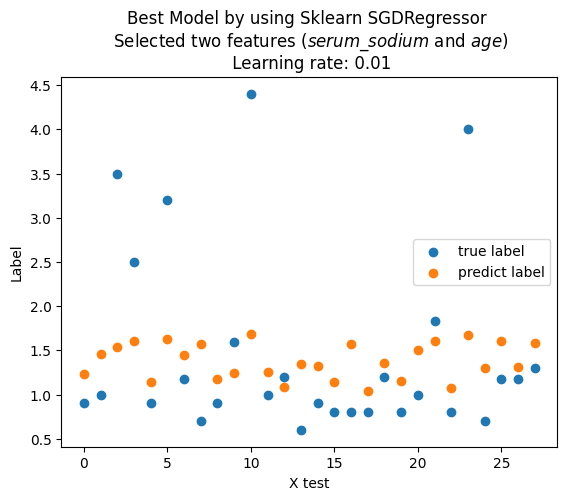

In [95]:
# Plot the true label and the predict label

# The best model select is the sklearn with just the two best features and learning rate equal 0.01
learning_rate = 0.01

# original and scaled train and valid data 
weights, y_test_features_top_2_predict_sklearn, mse_sklearn_features_top_2 = execute_linear_reg_sklearn(
    scaled_X_train_features_top_2, y_train, scaled_X_test_features_top_2, y_test, learning_rate)

print(f'-'*80)
print(f'MSE sklearn linear regression with the two best features correlations: {mse_sklearn_features_top_2}')
print(f'-'*80)

number_of_x = len(y_test_features_top_2_predict_sklearn)
plt.scatter(list(range(number_of_x)), y_test.reshape(-1,), label='true label')
plt.scatter(list(range(number_of_x)), y_test_features_top_2_predict_sklearn, label='predict label')
title = 'Best Model by using Sklearn SGDRegressor \n Selected two features ($serum$_$sodium$ and $age$) \n Learning rate: 0.01'
plt.title(title)
plt.xlabel('X test')
plt.ylabel('Label')
plt.legend(loc="center right")
plt.show()

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# TODO: Feature selection

> What are the conclusions? (1-2 paragraphs)

2. (2 points) Perform Multinomial Logistic Regression.

In [ ]:
# TODO: Logistic Regression. You can use scikit-learn libraries.

> What are the conclusions? (1-2 paragraphs)


3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

In [ ]:
# TODO: Oversampling. You can use scikit-learn and imblearn libraries.

In [ ]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.

> What are the conclusions? (1-2 paragraphs)

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

> What are the conclusions? (1-2 paragraphs)

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**